# Clustering and classification of 20newsgroup dataset
Starting over from scratch, 
comparing clustering to classification and attempting to predict classes with kmeans

with some twist like using powerful 
and less black-boxy tools from NLTK in a second part

In [7]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA, LatentDirichletAllocation
import pandas as pd
import nltk 

In [8]:
#Data extraction
data = fetch_20newsgroups()
x_test = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), subset='test')
x_train = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), subset='train')
y_test = x_test.target
test_target_names = x_test.target_names
train_target_names = x_train.target_names
y_train = x_train.target

x_test = x_test.data
x_train = x_train.data
cluster_number = len(np.unique(data.target))
cluster_number

20

In [ ]:
#Defining dict for cluster = target in clustering algorithms

def get_clust_to_target(estimator, target):
    

In [24]:
#Vectorize
tf_vectorizer = CountVectorizer(stop_words='english')
x_train_vectorized = tf_vectorizer.fit_transform(x_train)
x_test_vectorized = tf_vectorizer.transform(x_test)

In [25]:
#Kmeans
clustering_model = KMeans(n_clusters=cluster_number, random_state=42)

In [26]:
#LDA for dimension reduction
lda = LatentDirichletAllocation(n_components=100, n_jobs=-1, random_state=42)

In [27]:

x_train_reduit = lda.fit_transform(x_train_vectorized)
x_test_reduit = lda.transform(x_test_vectorized)
y_hat_train = clustering_model.fit(x_train_reduit)
y_hat_test = clustering_model.predict(x_test_reduit)

accuracy_LDA_kmeans = accuracy_score(y_test, y_hat_test)

print(f'{accuracy_LDA_kmeans=}')
report_LDA_kmeans = classification_report(y_test, y_hat_test, target_names= test_target_names)
print(report_LDA_kmeans)


c:\Users\simplet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


accuracy_LDA_kmeans=0.10860329261816251
                          precision    recall  f1-score   support

             alt.atheism       0.02      0.02      0.02       319
           comp.graphics       0.00      0.00      0.00       389
 comp.os.ms-windows.misc       0.00      0.00      0.00       394
comp.sys.ibm.pc.hardware       0.00      0.00      0.00       392
   comp.sys.mac.hardware       0.25      0.34      0.29       385
          comp.windows.x       0.00      0.00      0.00       395
            misc.forsale       0.00      0.00      0.00       390
               rec.autos       0.11      0.65      0.19       396
         rec.motorcycles       0.13      0.21      0.16       398
      rec.sport.baseball       0.01      0.00      0.00       397
        rec.sport.hockey       0.00      0.00      0.00       399
               sci.crypt       0.00      0.00      0.00       396
         sci.electronics       0.06      0.02      0.03       393
                 sci.med       0.12

<Axes: >

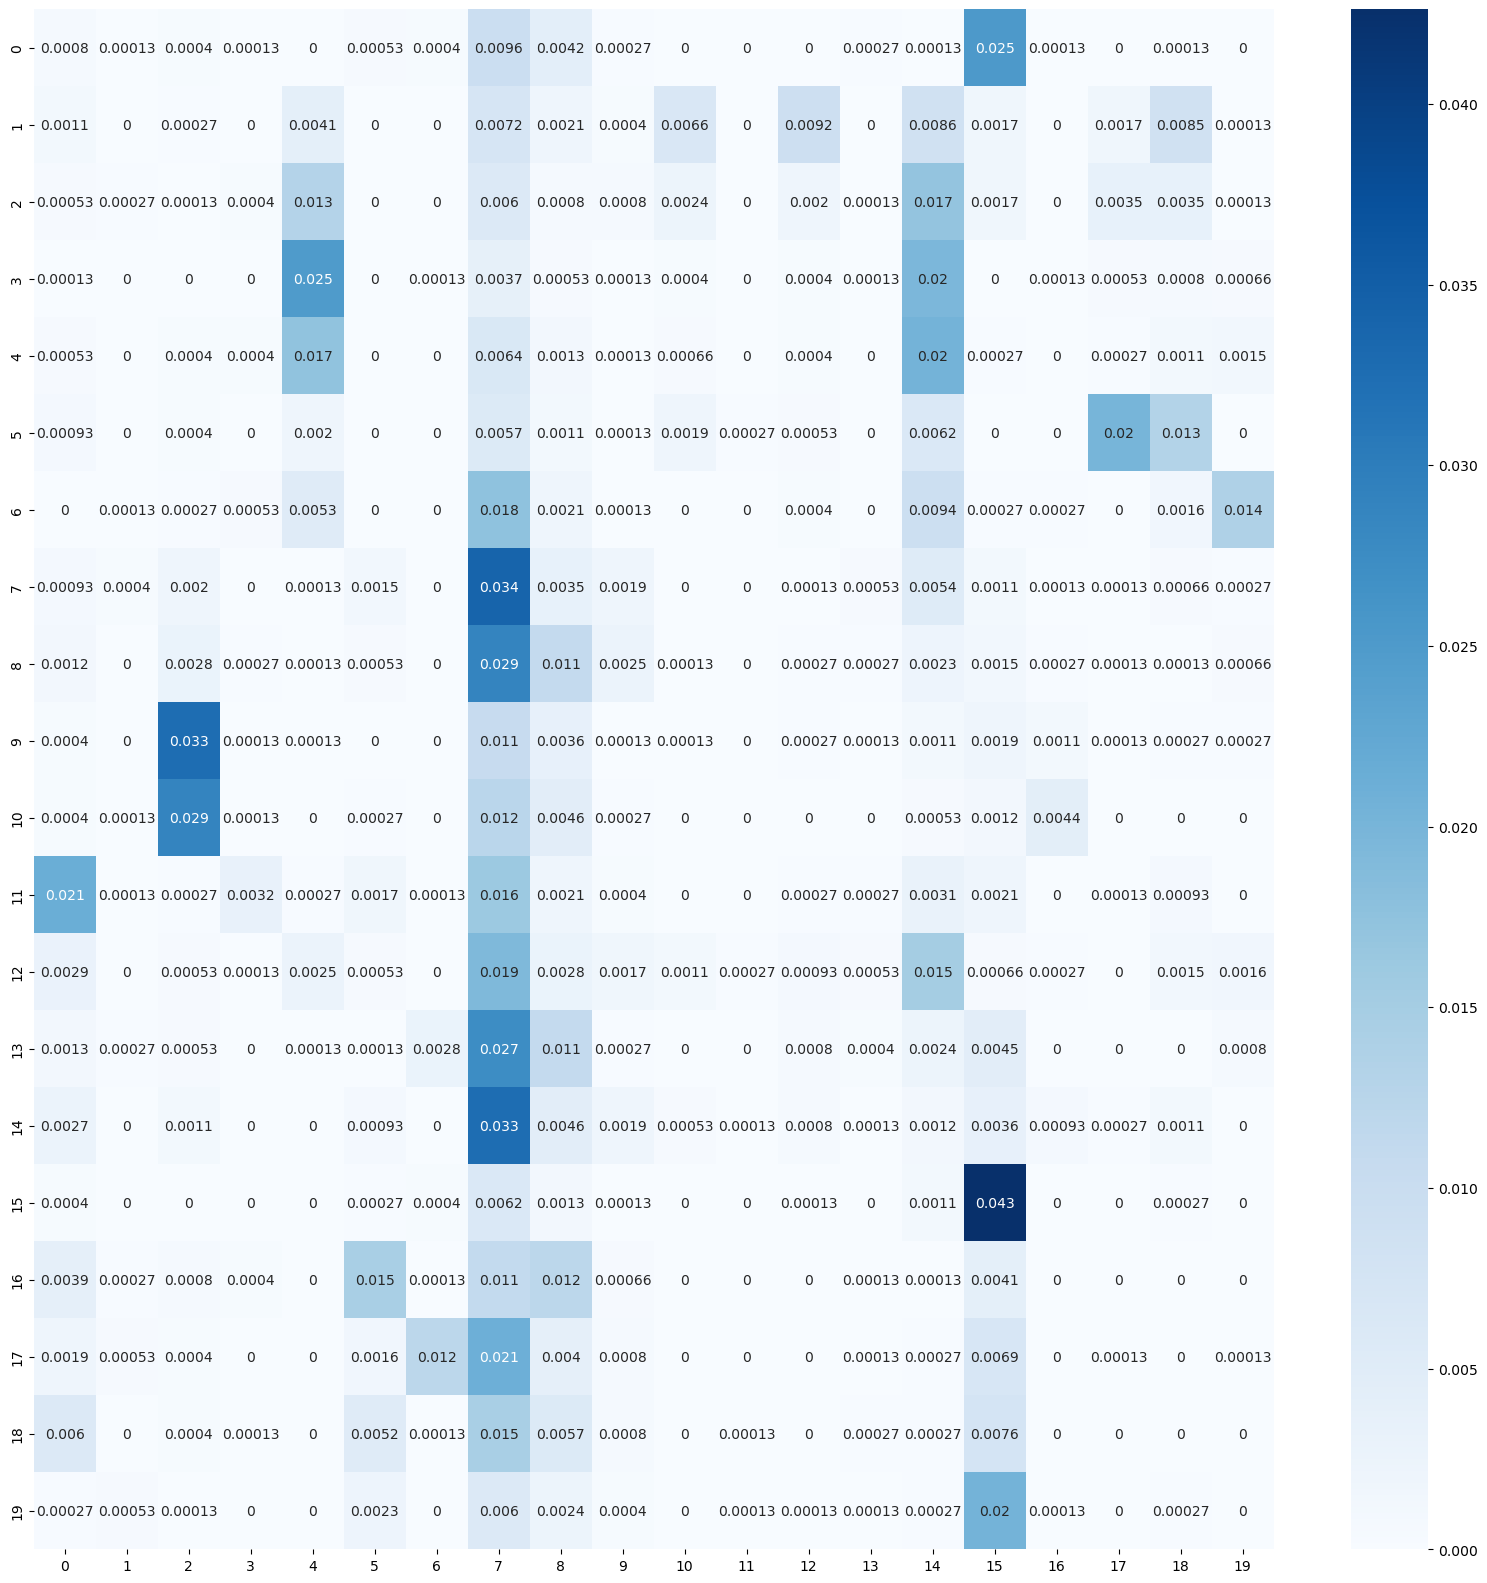

In [33]:
conf_matrix = confusion_matrix(y_test, y_hat_test)
conf_matrix = conf_matrix/conf_matrix.sum()
plt.figure(figsize=(20,20))
sns.heatmap(conf_matrix, cmap = 'Blues', annot = True)

In [28]:
clustering_model.labels_

array([ 7, 14, 12, ..., 14, 15, 10])

In [30]:
y_test

array([ 7,  5,  0, ...,  9,  6, 15])

In [29]:
x_test

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']